In [2]:
% pkg install -forge symbolic

In [3]:
warning('off','all');
pkg load symbolic;
graphics_toolkit("gnuplot");

In [4]:
syms x C;

x, C

Symbolic pkg v3.2.1: Python communication link active, SymPy v1.13.3.
x = (sym) x
C = (sym) C


In [5]:
((2*x)^2) - 3*x

ans = (sym)

     2      
  4*x  - 3*x



In [6]:
solve(((2*x)^2) - 3*x == 2, x)

ans = (sym 2x1 matrix)

  [      ____]
  [3   \/ 41 ]
  [- - ------]
  [8     8   ]
  [          ]
  [      ____]
  [3   \/ 41 ]
  [- + ------]
  [8     8   ]



In [7]:
k = 2.3

((2*k)^4) - log(k) * tan(k)

k = 2.3000
ans = 448.68


In [8]:
y(x) = 3 - 5*x + tan(x + C)

y(x) = (symfun) -5*x + tan(C + x) + 3


In [9]:
solve(y(1) == 1, C)

ans = (sym) -1 + atan(3)


In [10]:
determined_C = solve(y(1) == 1, C);

y(x) = 3 - 5*x + tan(x + determined_C)

y(x) = (symfun) -5*x + tan(x - 1 + atan(3)) + 3


In [11]:
lhs = diff(y(x), x)

lhs = (sym)

     2                     
  tan (x - 1 + atan(3)) - 4



In [12]:
(5*x + y - 1)^2 - 4*(5*x + y - 1)

ans(x) = (symfun)

                            2                             
  (tan(x - 1 + atan(3)) + 2)  - 4*tan(x - 1 + atan(3)) - 8



In [13]:
rhs = simplify(
    (5*x + y - 1)^2 - 4*(5*x + y - 1)
)

rhs = (sym)

     2                     
  tan (x - 1 + atan(3)) - 4



In [14]:
lhs == rhs

ans = (sym) True


In [15]:
y(x)

ans = (sym) -5*x + tan(x - 1 + atan(3)) + 3


In [16]:
x_axis = linspace(-0.5, 0.5, 80);

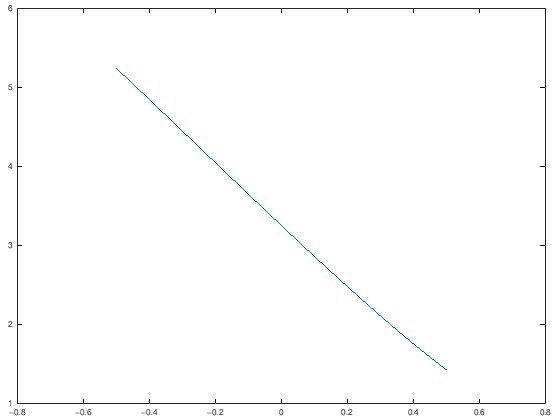

In [17]:
plot(x_axis, double(subs(y, x, x_axis)))

In [18]:
syms x y(x)

sol = dsolve(diff(y, x) == (5*x + y - 1)^2 - 4*(5*x + y - 1), y(1) == 1)

sol = (sym)

                                                                                 >
       2*I*x                        2*I             2*I*x   (1 + 2*I)*(2 - I)*(3 >
  5*x*e      - x*(1 + 2*I)*(2 - I)*e    + (-3 + I)*e      + -------------------- >
                                                                          5      >
  ------------------------------------------------------------------------------ >
                                                           2*I                   >
                                2*I*x   (1 + 2*I)*(2 - I)*e                      >
                             - e      + ----------------------                   >
                                                  5                              >
  
  >        2*I
  >  + I)*e   
  > ----------
  >           
  > ----------
  >           
  >           
  >           
  >           



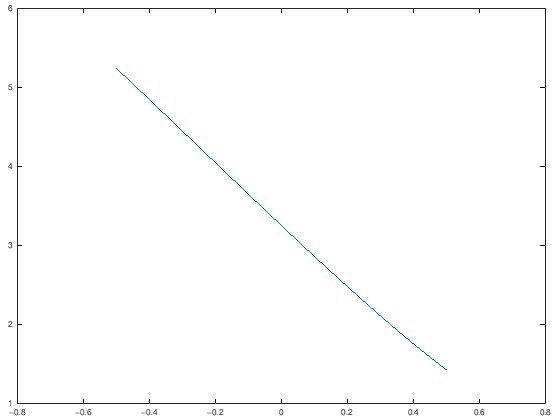

In [ ]:
plot(x_axis, double(subs(sol, x, x_axis)))